## Project Name : Customer Churn Analysis

# Dataset Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We are examining customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
                                                   ''' Importing required libraries '''

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
                                                     ''' Missing Values ''' 
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<AxesSubplot:>

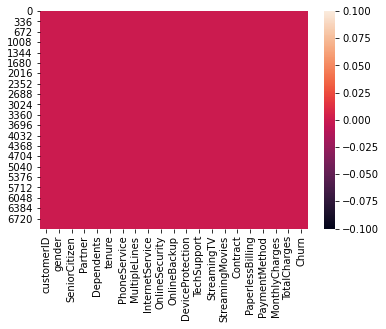

In [6]:
sns.heatmap(df.isnull())

we can see that there are no null values present in it.

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
                                                   ''' Dropping the column '''
    
# we are dropping the column as it dont contribute
df.drop(columns = 'customerID', inplace = True)

### Exploratory Data Analysis:

<Figure size 864x432 with 0 Axes>

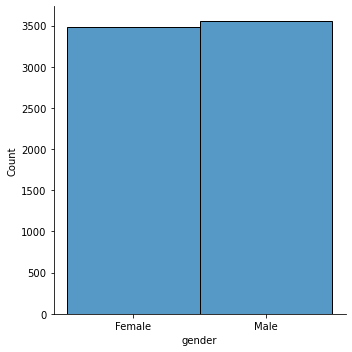

<Figure size 864x432 with 0 Axes>

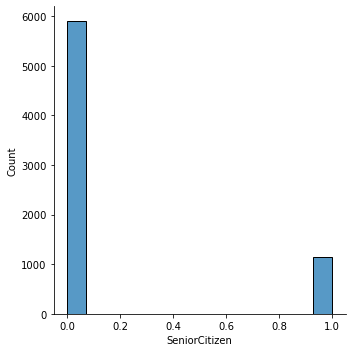

<Figure size 864x432 with 0 Axes>

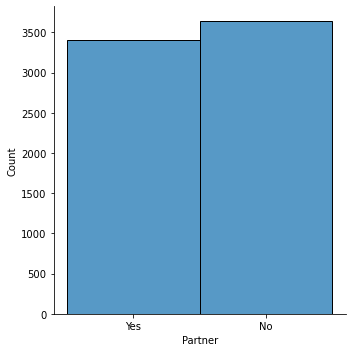

<Figure size 864x432 with 0 Axes>

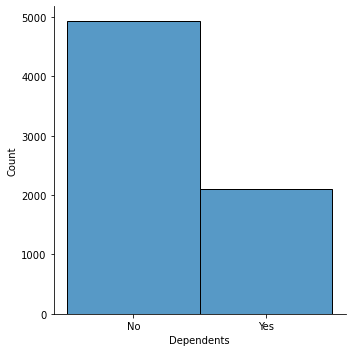

<Figure size 864x432 with 0 Axes>

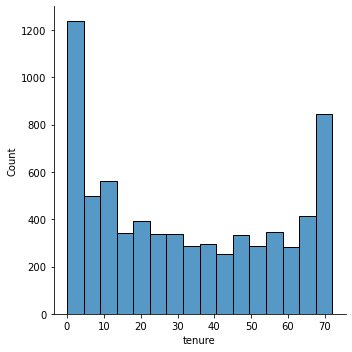

<Figure size 864x432 with 0 Axes>

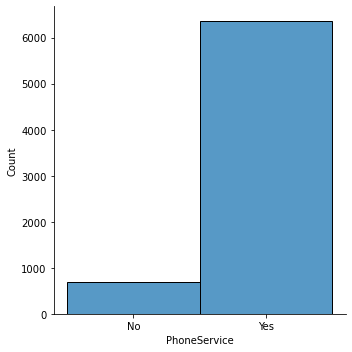

<Figure size 864x432 with 0 Axes>

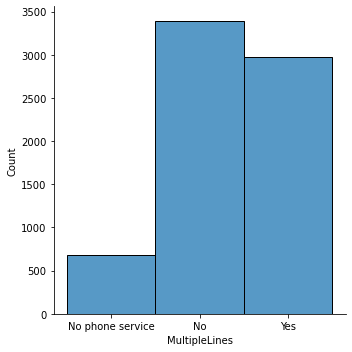

<Figure size 864x432 with 0 Axes>

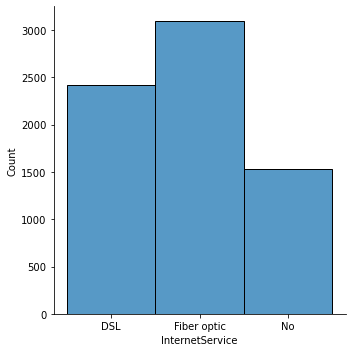

<Figure size 864x432 with 0 Axes>

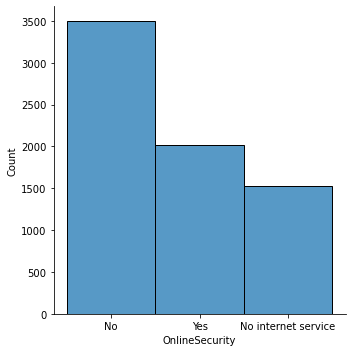

<Figure size 864x432 with 0 Axes>

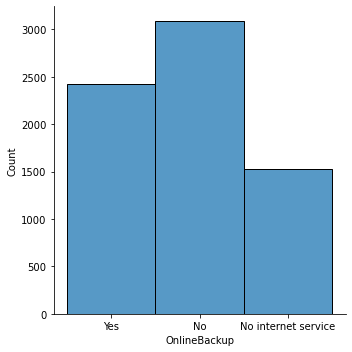

<Figure size 864x432 with 0 Axes>

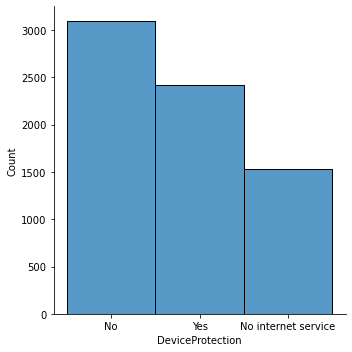

<Figure size 864x432 with 0 Axes>

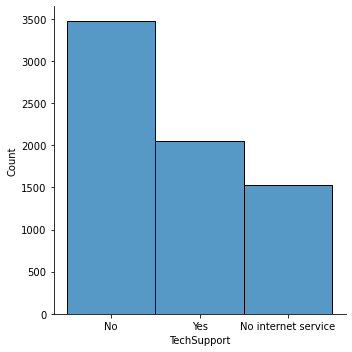

<Figure size 864x432 with 0 Axes>

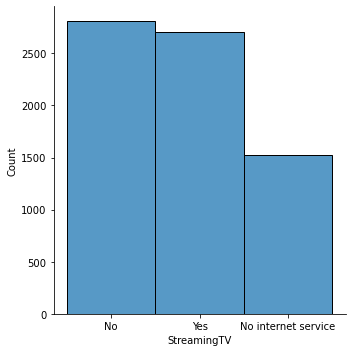

<Figure size 864x432 with 0 Axes>

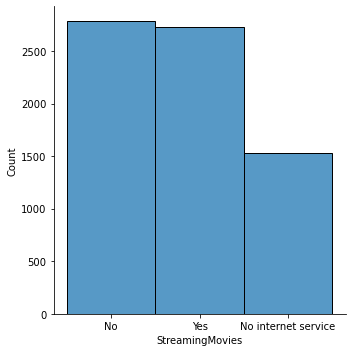

<Figure size 864x432 with 0 Axes>

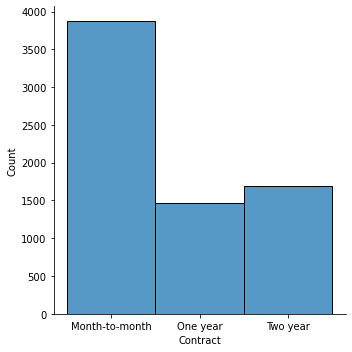

<Figure size 864x432 with 0 Axes>

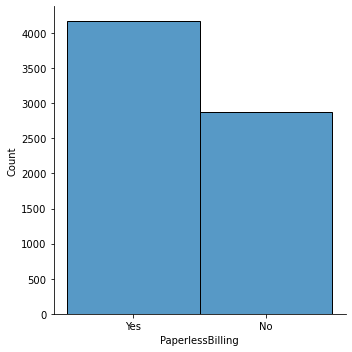

<Figure size 864x432 with 0 Axes>

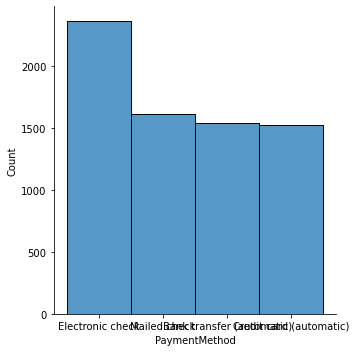

<Figure size 864x432 with 0 Axes>

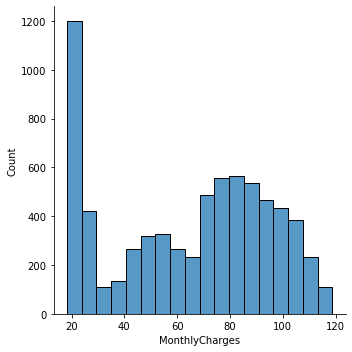

<Figure size 864x432 with 0 Axes>

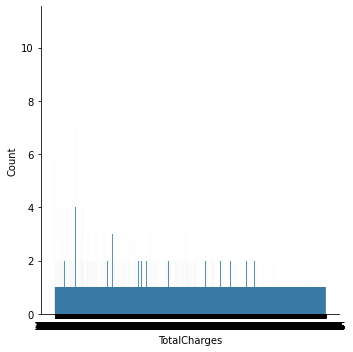

<Figure size 864x432 with 0 Axes>

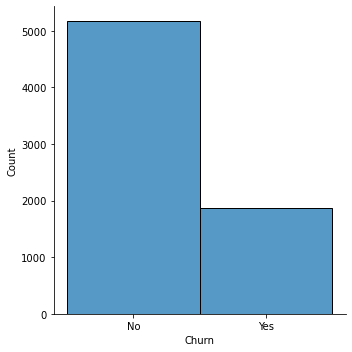

In [9]:
for i in df:
    plt.figure(figsize=(12,6))
    sns.displot(df[i])
    plt.show()

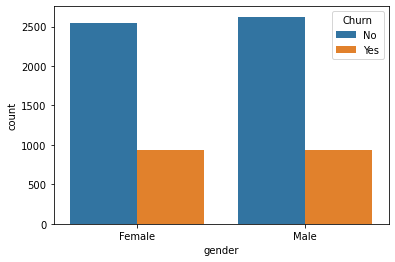

In [10]:
sns.countplot(x = 'gender', hue = 'Churn', data = df)
plt.show()

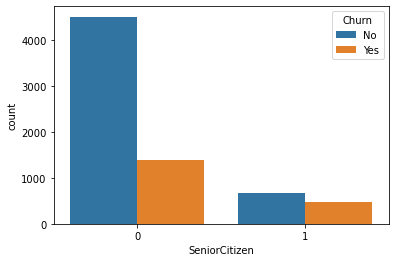

In [11]:
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = df)
plt.show()

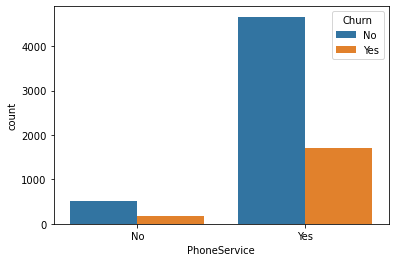

In [12]:
sns.countplot(x = 'PhoneService', hue = 'Churn', data = df)
plt.show()

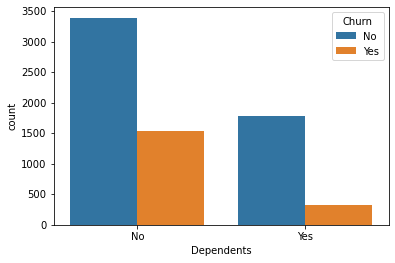

In [13]:
sns.countplot(x = 'Dependents', hue = 'Churn', data = df)
plt.show()

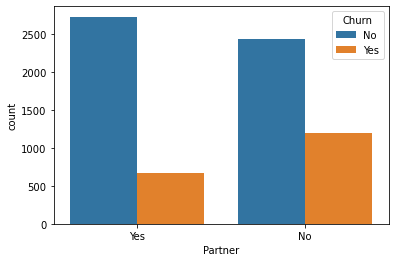

In [14]:
sns.countplot(x = 'Partner', hue = 'Churn', data = df)
plt.show()

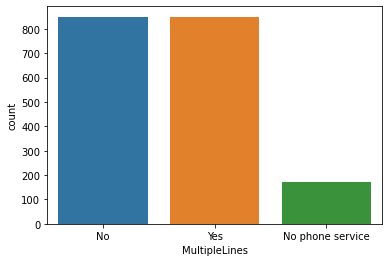

In [15]:
sns.countplot(x = "MultipleLines", data = df.loc[df["Churn"] == "Yes"])
plt.show()

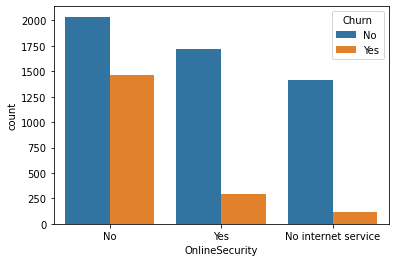

In [16]:
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = df)
plt.show()

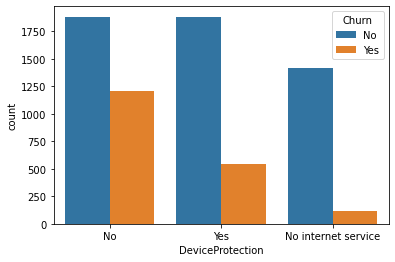

In [17]:
sns.countplot(x = 'DeviceProtection', hue = 'Churn', data = df)
plt.show()

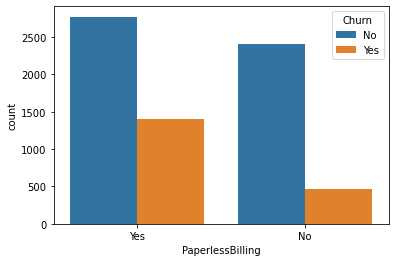

In [18]:
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = df)
plt.show()

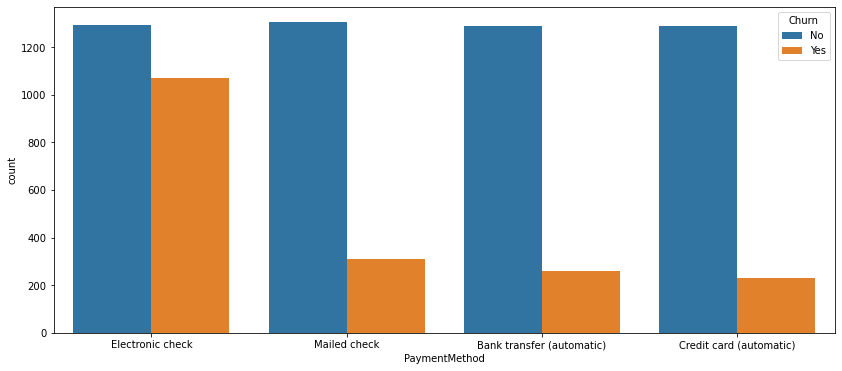

In [19]:
plt.subplots(figsize=(14,6))
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = df)
plt.show()

### Statistical Summary:

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Encoding:

#### Ordinal Encoder

In [21]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

#### Label Encoder

In [23]:
 from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Churn'] = labelencoder.fit_transform(df['Churn'])

### Correlation:

In [24]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


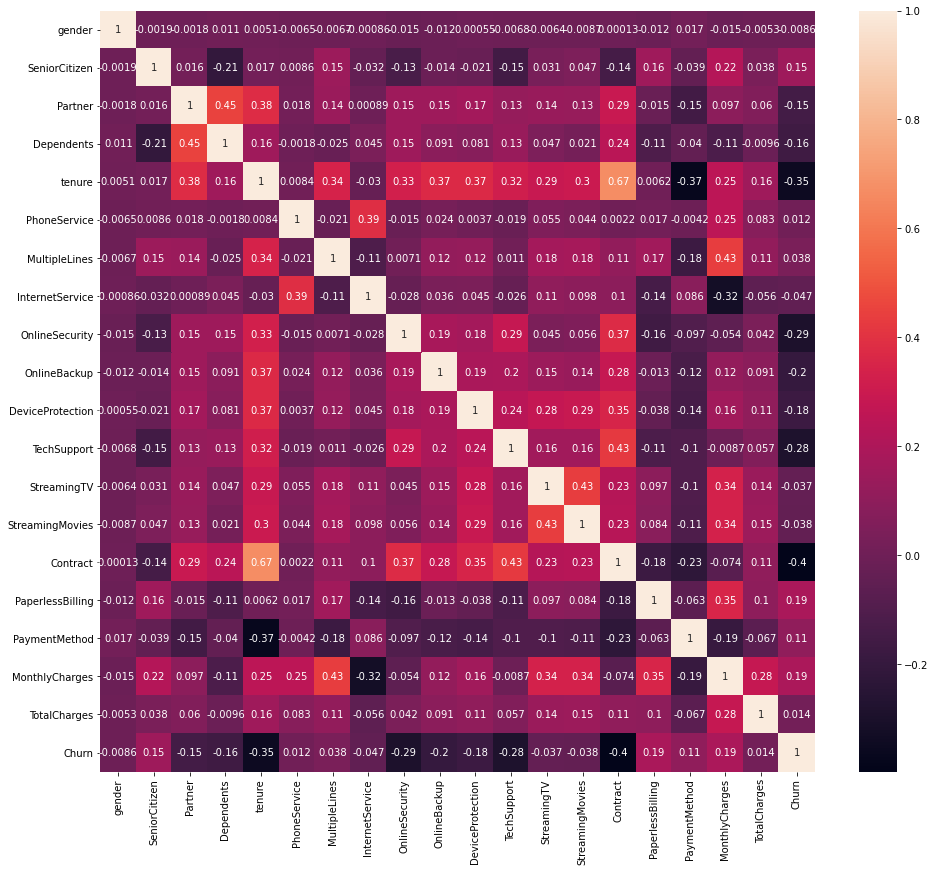

In [25]:
corr_hmap=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Removing Outliers:

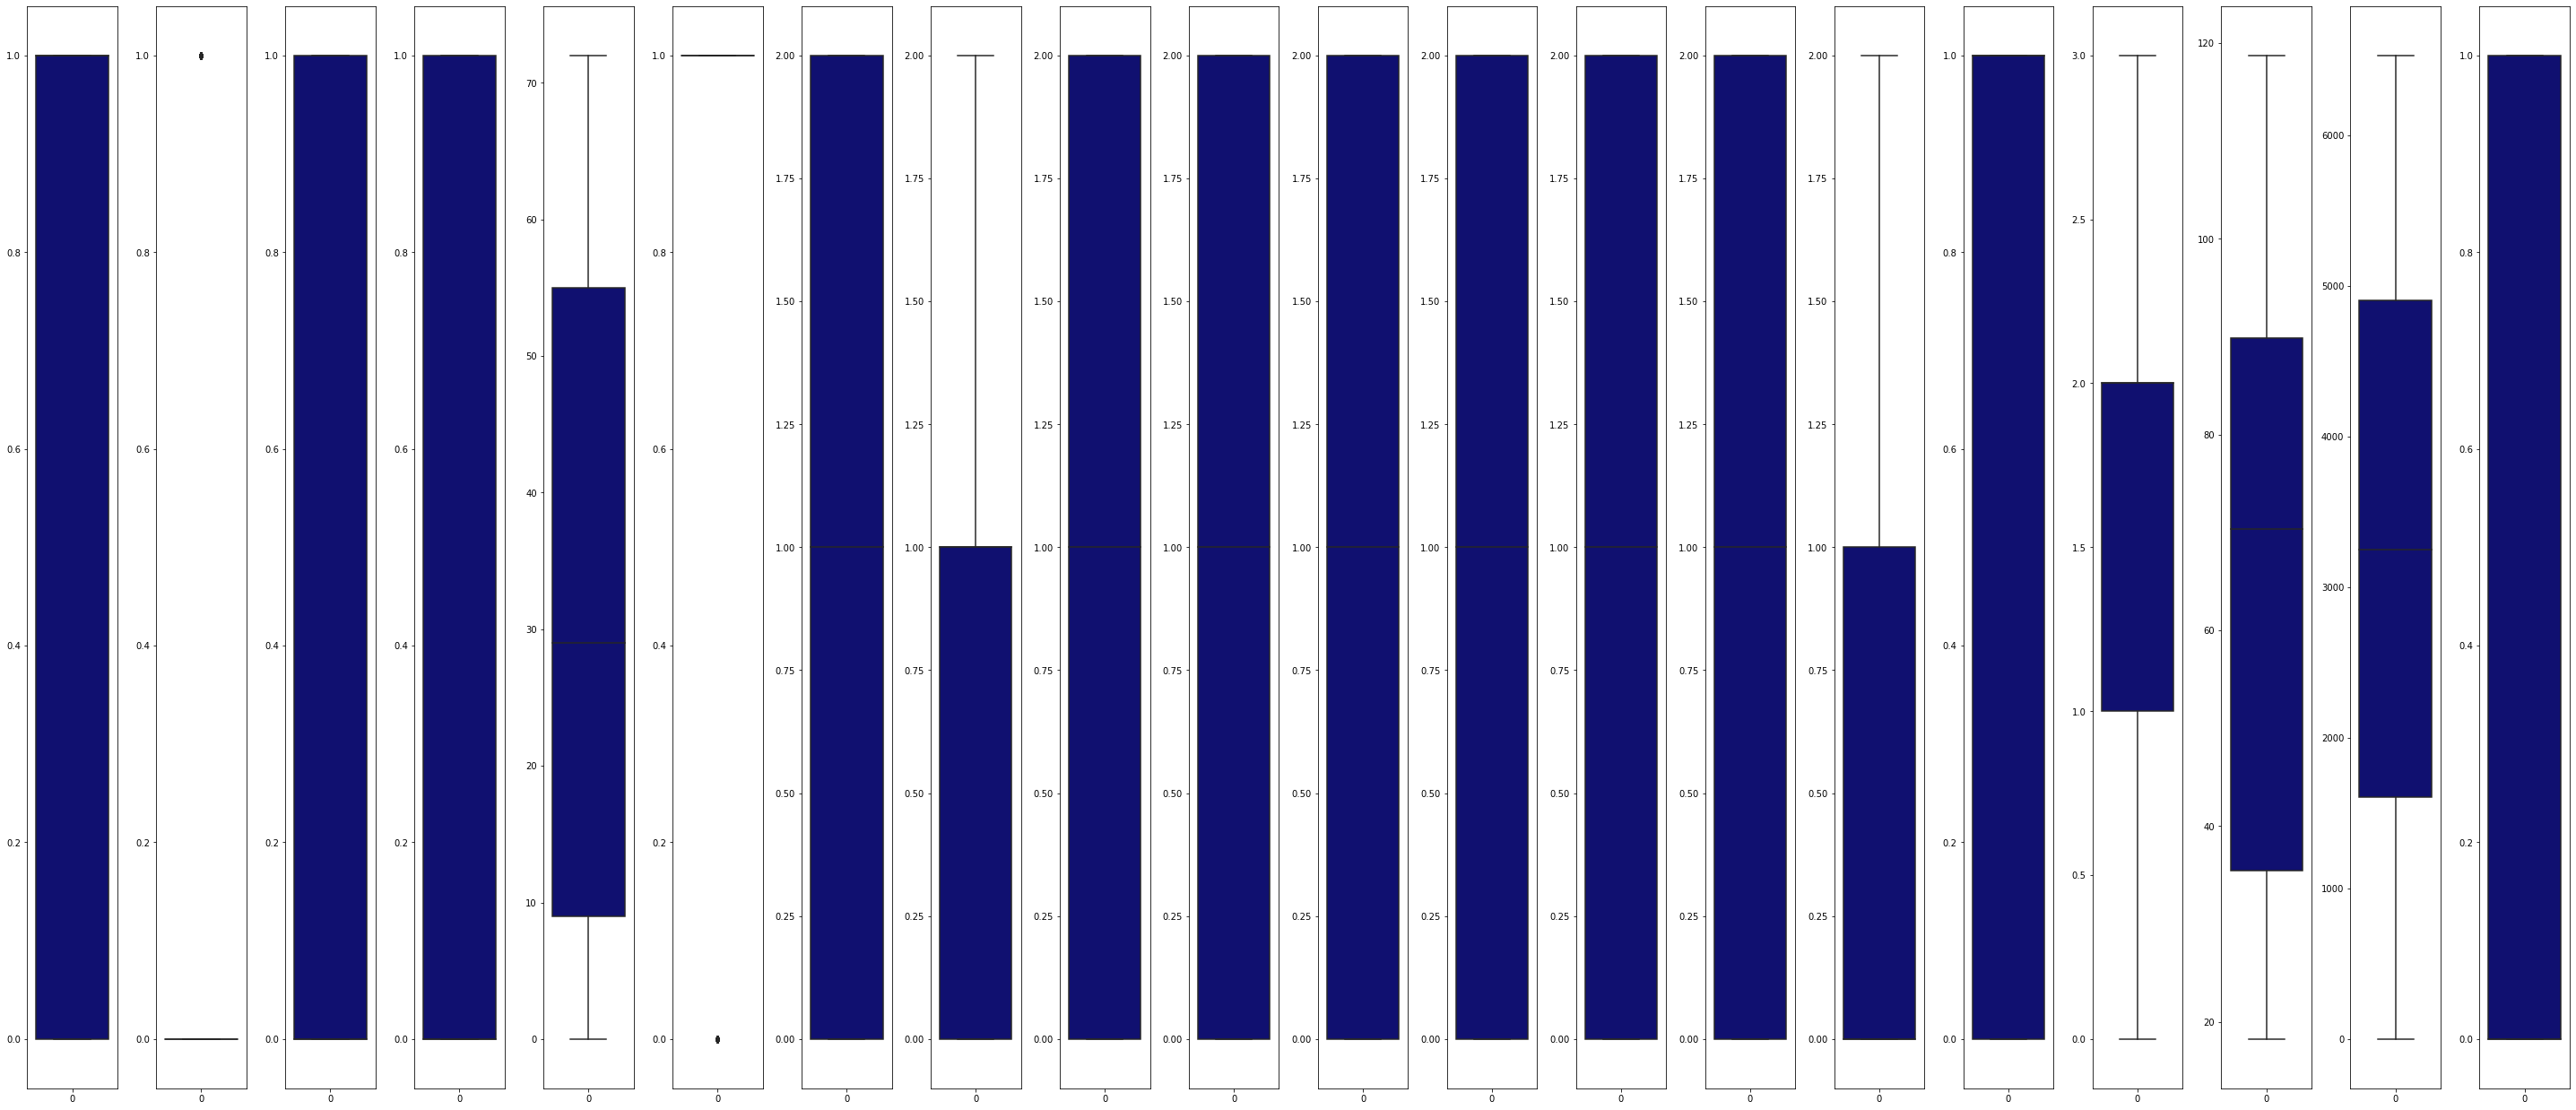

In [26]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(2*ncol,8*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='navy',orient='v')
    plt.tight_layout()

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [28]:
new_df=df[(z<3).all(axis=1)]

In [29]:
new_df.shape

(6361, 20)

In [30]:
df.shape

(7043, 20)

In [32]:
                                                    '''   Data Loss   '''

Data_loss = ((7043-6361)/7043)*100
Data_loss

9.683373562402386

The loss of data after removing the ouliers is 9.68%.

### Skewness:

In [33]:
new_df.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

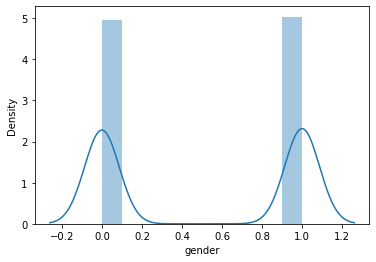

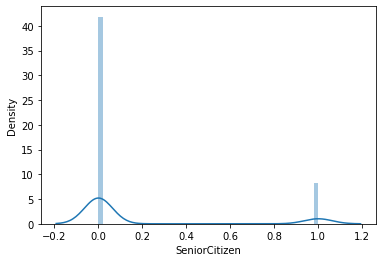

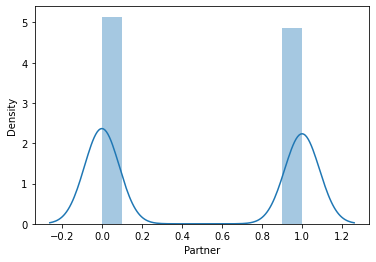

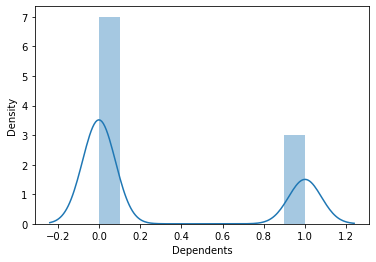

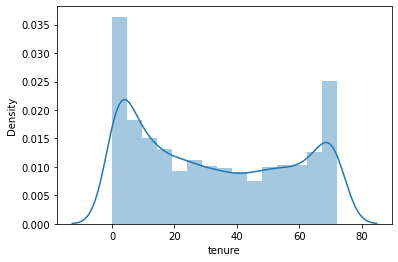

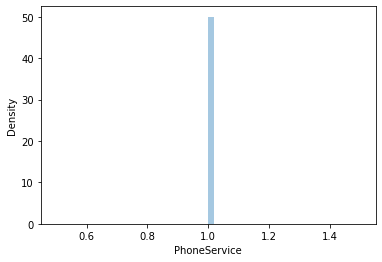

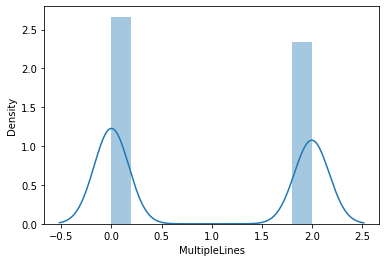

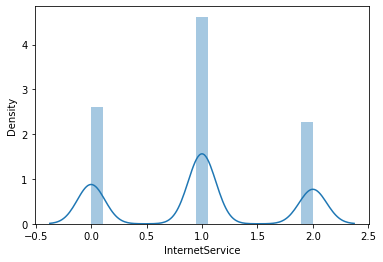

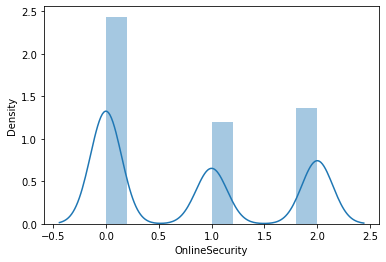

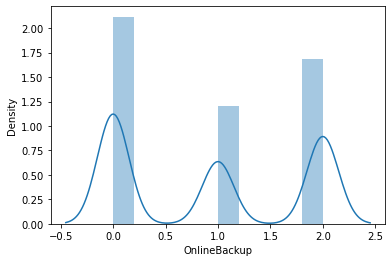

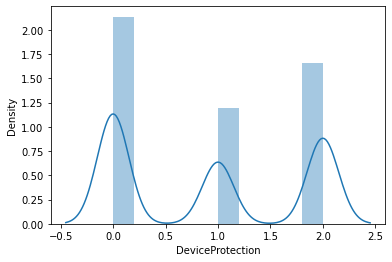

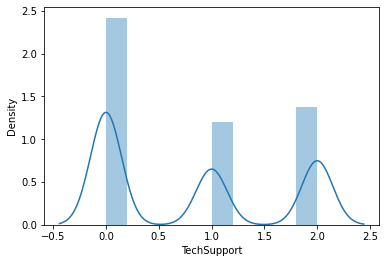

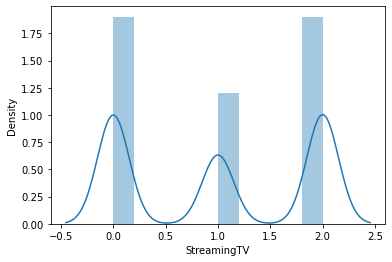

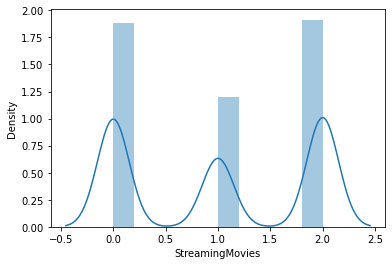

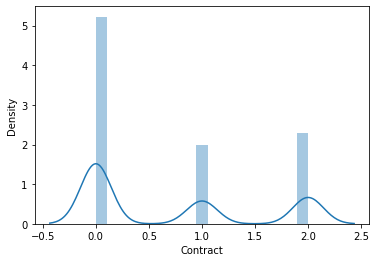

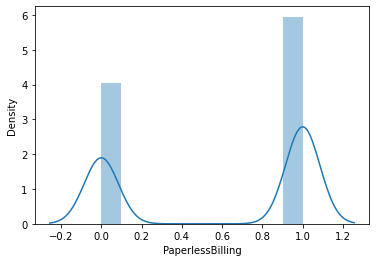

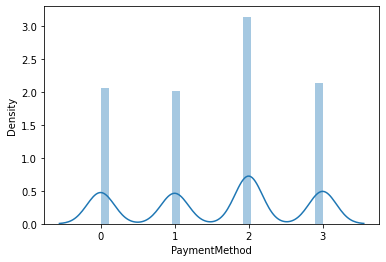

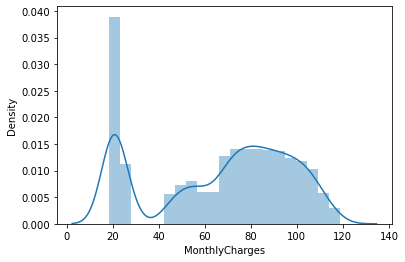

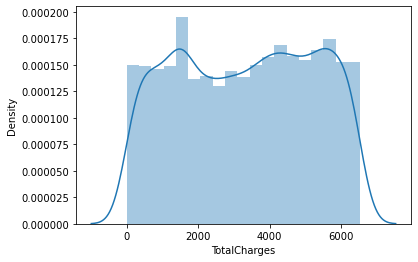

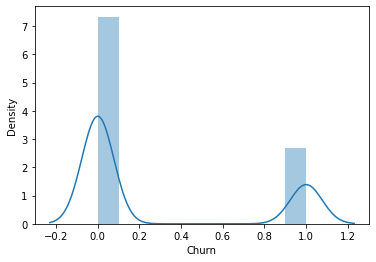

In [34]:
for i in new_df:
    sns.distplot(new_df[i])
    plt.show()

### Removing Skewness:

In [35]:
for i in new_df.columns:
    
    # we are using log transformation method to remove skewness
    if new_df.skew().loc[i]>0.5:
        new_df[i]=np.log1p(new_df[i])
        
        # we are using square method to remove skewness
        if new_df.skew().loc[i]<-0.5:
            new_df[i]=np.square(new_df[i])

In [36]:
new_df.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.433480
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

### Spliting the data into Feature and Target:

In [37]:
x = df.drop(columns = 'Churn')
y = df['Churn']

In [38]:
x.shape

(7043, 19)

In [39]:
y.shape

(7043,)

In [40]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0


In [41]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### Scalling:

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [43]:
                                            ''' Importing all the required libraries '''
    
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [44]:
lc=LogisticRegression()
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lc.fit(x_train,y_train)
    pred=lc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("We are getting the Best Accuracy is",maxAccu," on Random_state",maxRS)

We are getting the Best Accuracy is 0.8275372604684174  on Random_state 139


### Train Test Split the data:

We got the Best Accuracy is 0.8275372604684174  on Random_state 139. Hence, using these values we are going to train our data using following models :-

Logostic Regression

Decision Tree Classifier

Random Forest Classifier

GaussianNB

KNeighbors Classifier

Gradient Boosting Classifier

SVC

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=139)

In [46]:
x_train.shape

(5282, 19)

In [47]:
x_test.shape

(1761, 19)

In [48]:
y_train.shape

(5282,)

In [49]:
y_test.shape

(1761,)

In [50]:
                                                   ''' Logistic Regression '''

lc=LogisticRegression()
lc.fit(x_train,y_train)
pred=lc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the CV score
cv=cross_val_score(lc,x,y,cv=5).mean()
print("Cross Validation Score for Logistic Regression is : ",cv)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cv
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.8205565019875071
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[1188  110]
 [ 206  257]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1298
           1       0.70      0.56      0.62       463

    accuracy                           0.82      1761
   macro avg       0.78      0.74      0.75      1761
weighted avg       0.81      0.82      0.81      1761

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Cross Validation Score for Logistic Regression is :  0.8033525348409574
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.017203967146549703


In [51]:
#Decision Tree Classifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvdt=cross_val_score(dt,x,y,cv=5).mean()
print("Cross Validation Score for Decision Tree Classifier is : ",cvdt)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvdt
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.747870528109029
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[1073  225]
 [ 219  244]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1298
           1       0.52      0.53      0.52       463

    accuracy                           0.75      1761
   macro avg       0.68      0.68      0.68      1761
weighted avg       0.75      0.75      0.75      1761

Cross Validation Score for Decision Tree Classifier is :  0.722134290921995
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.025736237187033995


In [52]:
                                                ''' Random Forest Classifier '''

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvrf=cross_val_score(rf,x,y,cv=5).mean()
print("Cross Validation Score for Random Forest Classifier is : ",cvrf)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvrf
print("\nAccuracy Score - Cross Validation Score :", result)


Accuracy Score: 0.8109028960817717
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[1191  107]
 [ 226  237]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1298
           1       0.69      0.51      0.59       463

    accuracy                           0.81      1761
   macro avg       0.76      0.71      0.73      1761
weighted avg       0.80      0.81      0.80      1761

Cross Validation Score for Random Forest Classifier is :  0.7911408598941867
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.019762036187584986


In [53]:
                                                    ''' GaussianNB ''' 

gb=GaussianNB()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvgb=cross_val_score(gb,x,y,cv=5).mean()
print("Cross Validation Score for GaussianNB is : ",cvgb)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvgb
print("\nAccuracy Score - Cross Validation Score :", result)


Accuracy Score: 0.7643384440658717
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[1005  293]
 [ 122  341]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1298
           1       0.54      0.74      0.62       463

    accuracy                           0.76      1761
   macro avg       0.71      0.76      0.73      1761
weighted avg       0.80      0.76      0.77      1761

Cross Validation Score for GaussianNB is :  0.755501867055939
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.008836577009932678


In [54]:
                                                  ''' KNeighbors Classifier '''

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print("Cross Validation Score for KNeighborsClassifier is : ",cvknn)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvknn
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.7393526405451448
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[1087  211]
 [ 248  215]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1298
           1       0.50      0.46      0.48       463

    accuracy                           0.74      1761
   macro avg       0.66      0.65      0.65      1761
weighted avg       0.73      0.74      0.74      1761

Cross Validation Score for KNeighborsClassifier is :  0.7512423180527776
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : -0.011889677507632812


In [55]:
                                              ''' Gradient Boosting Classifier '''

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvgbc=cross_val_score(gbc,x,y,cv=5).mean()
print("Cross Validation Score for Gradient Boosting Classifier is : ",cvgbc)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvgbc
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.8109028960817717
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[1187  111]
 [ 222  241]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1298
           1       0.68      0.52      0.59       463

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761

Cross Validation Score for Gradient Boosting Classifier is :  0.8034927656623008
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.007410130419470917


In [56]:
                                                   '''  SVC  '''

svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print("Cross Validation Score for SVC is : ",cvsvc)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvsvc
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.8143100511073254
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[1214   84]
 [ 243  220]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      1298
           1       0.72      0.48      0.57       463

    accuracy                           0.81      1761
   macro avg       0.78      0.71      0.73      1761
weighted avg       0.80      0.81      0.80      1761

Cross Validation Score for SVC is :  0.7976728337312085
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.016637217376116897


### Overfitting & Underfitting:

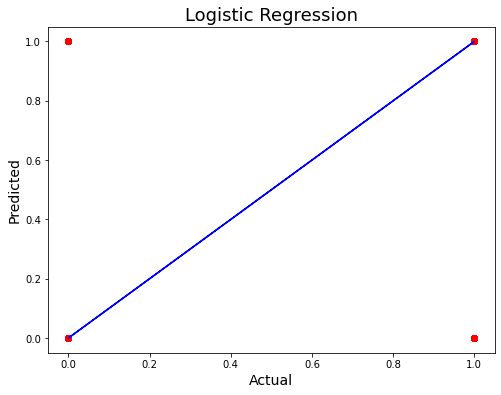

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

### Hyper Parameter Tuning:

We are selecting Gradient Boosting Classifier as our best model as it has least difference between it's Accuracy score and CV score

In [58]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameter={'learning_rate':[0.1],
          'max_features':[None],
          'min_samples_leaf':[1],
          'n_estimators':[100]}

In [66]:
GCV=GridSearchCV(gbc,parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1], 'max_features': [None],
                         'min_samples_leaf': [1], 'n_estimators': [100]})

In [67]:
''' Getting the best parameters using GridSearchCV '''

GCV.best_params_

{'learning_rate': 0.1,
 'max_features': None,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [69]:
churn_final=GradientBoostingClassifier(learning_rate=0.1, max_features=None, min_samples_leaf=1, n_estimators=100)
churn_final.fit(x_train,y_train)
pred=churn_final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

81.09028960817717


### We are getting the model accuracy and cross validation score both as81.09% which shows our model is performing well.

### AUC - ROC Curve:

AUC Curve - A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

ROC Curves - It summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

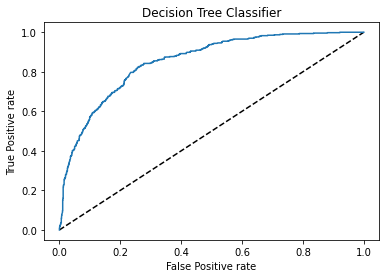

0.7175010898973999


In [71]:
y_pred_proba= gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='dtr')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Decision Tree Classifier')
plt.show()

# Getting the AUC score
auc_score=roc_auc_score(y_test,gbc.predict(x_test))
print(auc_score)

### Saving the model:

In [72]:
import joblib
joblib.dump(churn_final,"Customer Churn Analysis.pkl")

['Customer Churn Analysis.pkl']

In [73]:
churn_model = joblib.load(open('Customer Churn Analysis.pkl','rb'))
result = churn_model.score(x_test,y_test)
print(result)

0.8109028960817717


In [74]:
Conclusion = pd.DataFrame([churn_model.predict(x_test)[:],gbc.predict(x_test)[:]],index=["Predicted","Original"])

In [75]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760
Predicted,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
Original,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


                                                  ---- --:-- ----